<img src="img/viu_logo.png" width="200">

# 07MAIR - Redes Neuronales y Deep Learning
## Clase 02: Redes neuronales artificiales
<img src="img/keras_logo.jpg" width="200">

### Profesores: Adrián Colomer Granero / Gabriel Enrique Muñoz Ríos
### Autor: Carlos Fernández Musoles

### Sumario
- Funciones de activación
- Visualización con Tensorflow playground
- Ejemplo mnist keras
- Optimización

<img src="img/xor_multi_layer.png" width="300">

<img src="img/xor_multi_layer_solucion.png" width="300">

### Diferencias en batch size?
- Batch size 1
- tamaño del training set > Batch size > 1
- Batch size == tamaño del training set

- Batch size 1 
 - menos memoria, convergencia más lenta, época lenta

- Batch size == tamaño del training set
 - época es rápida, más memoria, más épocas

- tamaño del training set > Batch size > 1
 - balance entre las dos
 - valor exacto: ¿arte?

# Parámetros en el entrenamiento de ANNs

- Época (1 pase de todos los training samples)
- batch size (número de training samples considerados para hacer una modificación de los parámetros de la red)
- learning rate (magnitud del cambio en cada actualización)
- función de pérdida (error entre lo esperado y lo hallado)

- tradeoffs: 
 - batch size (alto lento en entrenar, mucha memoria, bajo poca memoria, erratico en bajar el error)
 - learning rate (alto problemas para alcanzar minimos globales, bajo lentitud y posible estancamiento en minimo local).
 
VIsualización de entrenamiento con TensorFlow playground https://playground.tensorflow.org

## Función de activación 

Muchas disponibles: https://en.wikipedia.org/wiki/Activation_function

#### Umbral
<img src="img/stepfunc.png" width="300">

Fuente: Wikipedia https://en.wikipedia.org/wiki/Step_function

- Input > umbral = 1, else 0

- Difícil convergencia durante entrenamiento
- Para multiclase, cómo decidir el output correcto (tres 1 y un 0)

#### Linear

<img src="img/linear.png" width="300">

Fuente: Wikipedia https://en.wikipedia.org/wiki/Activation_function 

- Input - output linear
- Output -inf a +inf

- Combinación de funciones lineales da una funcion lineal
- Explosión de valores (dificil entrenamiento)

#### Sigmoide

<img src="img/sigmoid.png" width="300">

- No linear
- Output 0 a 1

- Problema: entrenamiento puede ser lento cuando los valores residen en los extremos

#### Tangencial

<img src="img/tanh.png" width="300">

Fuente: Wolfram https://reference.wolfram.com/language/ref/Tanh.html

- No linear
- Output -1 a 1

- Gradiente más fuerte que sigmoide (derivadas son más intensas, por lo que la convergencia puede dificultarse)

#### ReLU (Rectified Linear Unit)

<img src="img/relu.png" width="300">

Fuente: Wikipedia https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

- No linear
- Output 0 a +inf

- Cualquier función puede aproximarse con una combinacion de ReLUs
- Aunque puede explotar (lado positivo) es más eficiente (menos calculos) que sigmoid o tanh
 - sigmoid / tanh requieren que todas las neuronas emitan un valor
 - calculo de la función de activacion es mas costoso
 - con ReLU, muchas serán 0 (sin calculo)

### La no linearidad de la funcion de activación es lo que permite a las ANNs aprender decision boundaries que no son lineales

### Variaciones de SGD
- rmsprop: dividir gradiente entre la media de las magnitudes recientes 
- momentum: la magnitud del cambio al actualizar parametros depende del gradiente actual y del cambio anterior. velocity = past_vel * momentum + learning_rate * gradient
- Otros disponibles en Keras https://keras.io/optimizers/

# Instalacion de Keras
- instalacion backend (GPU, CPU)
```python
pip install tensorflow
```
- Se puede utilizar la version GPU
 - Mas info https://www.tensorflow.org/install/gpu

- Instanacion de keras (pip)
```python
pip install keras
```

## Elemplo
Keras y el dataset MNIST para el reconocimiento de digitos escritos a mano

In [1]:
# cargar el dataset
from keras.datasets import mnist

# dividir en training y testing sets
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

Using TensorFlow backend.


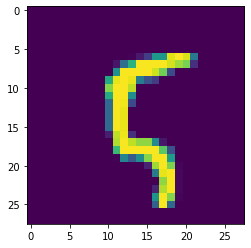

Label 5


In [3]:
# mostrar una imagen de prueba
import matplotlib.pyplot as plt
%matplotlib inline

ELEMENT=100

plt.imshow(train_data[ELEMENT])
plt.show()
print('Label {}'.format(train_labels[ELEMENT]))

In [4]:
train_data.shape
# tres dimensiones
    # 0 == muestras 
    # 1 == x coord
    # 2 == y coord

(60000, 28, 28)

In [5]:
# definicion del modelo ANN
from keras import models
from keras import layers

network = models.Sequential()
# queremos capas conectadas en feedforward (todas las unidades de una capa a todas las unidades de la siguiente)
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [6]:
# compilar el modelo
# elegimos funcion de perdida, algoritmo de descenso de gradiente
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Transformar los datos
- eliminar una dimension
- cambiar rango de 0-255 a 0-1
- labels categoricas

In [7]:
# Transformacion de los datos
# redimensionamos a 1D cada imagen
train_data = train_data.reshape((60000,28*28))
test_data = test_data.reshape((10000,28*28))

In [8]:
# normalizamos los datos (de 0 a 1)
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [10]:
print(train_labels[0])

5


In [11]:
# categorizamos las labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# entrenamos el modelo
# eleccion de parametros
#   epocas
#   batch size
network.fit(train_data,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.2537 - accuracy: 0.9262
Epoch 2/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.1032 - accuracy: 0.9692s - loss:
Epoch 3/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.0675 - accuracy: 0.9801
Epoch 4/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.0489 - accuracy: 0.9851s
Epoch 5/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0368 - accuracy: 0.9883s - loss: 0.0363 -  - ETA: 0s - loss: 0.0367 - accuracy: 0.


Evaluar el modelo con el set de test

In [13]:
loss, accuracy = network.evaluate(test_data,test_labels)
print('Loss {}, accuracy {}'.format(loss,accuracy))

10000/10000 [==============================] - 1s 50us/step
Loss 0.07362139124404639, accuracy 0.9787999987602234


In [16]:
import numpy as np
#predicciones
SAMPLE = 1000
sample = test_data[SAMPLE,:].reshape((1,28*28))
y_value = np.array(test_labels[SAMPLE]).reshape((1,10))
predictions = network.predict(sample)
print(predictions)
print('Total sum is {}, classified as {}, real value {}'.format(sum(predictions),np.argmax(predictions),np.argmax(y_value)))

[[6.1543703e-10 2.7494641e-08 1.7358464e-11 1.1342266e-04 7.3574006e-06
  2.8109923e-07 5.8985064e-14 2.5349153e-05 5.3750533e-08 9.9985349e-01]]
Total sum is [6.1543703e-10 2.7494641e-08 1.7358464e-11 1.1342266e-04 7.3574006e-06
 2.8109923e-07 5.8985064e-14 2.5349153e-05 5.3750533e-08 9.9985349e-01], classified as 9, real value 9


## Ejemplo REUTERS
Incluye como representar el proceso de aprendizaje

In [17]:
from keras.datasets import reuters

WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)

In [18]:
# los datos son numericos
# para decodificarlos, se puede usar reuters.get_word_index()

word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[1]]
)
decoded

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(WORD_LIMIT,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='sigmoid')) # output entre 0 y 1, probabilidad

Hot encoding palabras
<img src="img/hot_encoding.png" width="300">

In [20]:
import numpy as np

# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [21]:
training_set = one_hot_encode(training_data)
testing_set = one_hot_encode(testing_data)

In [22]:
from keras.utils import to_categorical

y_train = to_categorical(training_labels)
y_test = to_categorical(testing_labels)


In [24]:
y_train.shape
y_test.shape

(2246, 46)

In [25]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [12]:
#obtener historial del entrenamiento para estadisticas
history = model.fit(training_set,y_train,epochs=20,batch_size=512,
                   validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 1s 179us/step - loss: 3.3054 - acc: 0.4628 - val_loss: 2.7945 - val_acc: 0.5281
Epoch 2/20
7185/7185 [==============================] - 1s 147us/step - loss: 2.3934 - acc: 0.4269 - val_loss: 2.1536 - val_acc: 0.3450
Epoch 3/20
7185/7185 [==============================] - 1s 148us/step - loss: 1.8666 - acc: 0.3534 - val_loss: 1.8961 - val_acc: 0.3450
Epoch 4/20
7185/7185 [==============================] - 1s 159us/step - loss: 1.6143 - acc: 0.3534 - val_loss: 1.7745 - val_acc: 0.3450
Epoch 5/20
7185/7185 [==============================] - 1s 203us/step - loss: 1.3958 - acc: 0.3535 - val_loss: 1.5055 - val_acc: 0.3456
Epoch 6/20
7185/7185 [==============================] - 1s 165us/step - loss: 1.1410 - acc: 0.3680 - val_loss: 1.3596 - val_acc: 0.4908
Epoch 7/20
7185/7185 [==============================] - 1s 163us/step - loss: 0.7735 - acc: 0.8021 - val_loss: 1.0487 - val_acc: 0.7596


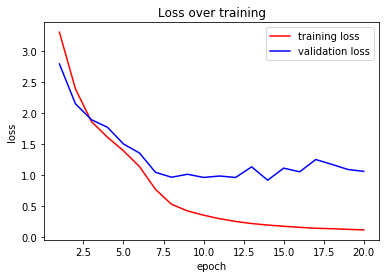

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot loss
epochs = np.arange(1,len(history.history['loss'])+1)
plt.title('Loss over training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history.history['loss'],'r',label='training loss')
plt.plot(epochs,history.history['val_loss'],'b',label='validation loss')
plt.legend(loc='best')
plt.show()

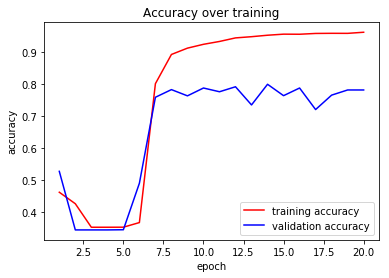

In [14]:
#plot accuracy
epochs = np.arange(1,len(history.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [15]:
model.predict(testing_set)
loss, accuracy = model.evaluate(testing_set,y_test)

2246/2246 [==============================] - 0s 140us/step


In [16]:
print('Loss {}, accuracy {}'.format(loss,accuracy))

Loss 1.1145100969346846, accuracy 0.778717720444884


### Ejercicio
Comparar los resultados con otros modelos
- alterar la arquitectura de la red (numero de neuronas, numero de layers)
- Mostrar que con menos hidden units se pierde info que no se puede recuperar
- 'tanh' en vez de 'relu'
- distinto split training / validation (mayoria validation)

# Optimizacion de redes neuronales
- Preprocesado para ANN: 
 - vectorizacion del input (tensores)
 - normalizacion de valores para acelerar entrenamiento (todas las features deben tener misma escala), media 0 std 1
 - Valores missing: eliminar, utilizar 0 (si 0 no tiene significado)

- Feature engineering (menos importante en deep learning)
 - Feature cross
 - creacion de features basadas en el dominio

- Weight regularization
- Dropout

### Weight regularisation

- El modelo mas sencillo (menos parametros) que explique los datos es preferido
- Evitar overfitting
- Hace que los parametros tengan valores muy pequeños (coste a cada solución dependiente de la magnitud de los parametros)
 - coste proporcional al valor absoluto (L1) o proporcional a la raiz cuadrada del valor

In [18]:
from keras.datasets import mnist
from keras import models
from keras import layers

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.reshape((60000,28*28))
train_data = train_data.astype('float32')/255
test_data = test_data.reshape((10000,28*28))
test_data = test_data.astype('float32')/255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [19]:
#modelo sin regularizacion
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(256,activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_network = network.fit(train_data,train_labels,epochs=30,batch_size=128,validation_split=0.8)

Train on 11999 samples, validate on 48001 samples
Epoch 1/30
11999/11999 [==============================] - 2s 149us/step - loss: 0.4520 - acc: 0.8643 - val_loss: 0.2813 - val_acc: 0.9144
Epoch 2/30
11999/11999 [==============================] - 2s 144us/step - loss: 0.1919 - acc: 0.9439 - val_loss: 0.2219 - val_acc: 0.9318
Epoch 3/30
11999/11999 [==============================] - 2s 149us/step - loss: 0.1198 - acc: 0.9656 - val_loss: 0.1611 - val_acc: 0.9520
Epoch 4/30
11999/11999 [==============================] - 2s 161us/step - loss: 0.0777 - acc: 0.9763 - val_loss: 0.1565 - val_acc: 0.9536
Epoch 5/30
11999/11999 [==============================] - 2s 146us/step - loss: 0.0550 - acc: 0.9833 - val_loss: 0.1484 - val_acc: 0.9571
Epoch 6/30
11999/11999 [==============================] - 2s 151us/step - loss: 0.0371 - acc: 0.9887 - val_loss: 0.1505 - val_acc: 0.9588
Epoch 7/30
11999/11999 [==============================] - 3s 216us/step - loss: 0.0217 - acc: 0.9935 - val_loss: 0.1900 - 

In [20]:
#modelo con regularizacion L2
from keras import regularizers

network_l2reg = models.Sequential()
network_l2reg.add(layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
network_l2reg.add(layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
network_l2reg.add(layers.Dense(10,activation='softmax'))

network_l2reg.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_network_l2reg = network_l2reg.fit(train_data,train_labels,epochs=30,batch_size=128,validation_split=0.8)

Train on 11999 samples, validate on 48001 samples
Epoch 1/30
11999/11999 [==============================] - 3s 235us/step - loss: 1.1109 - acc: 0.8506 - val_loss: 0.7545 - val_acc: 0.9186
Epoch 2/30
11999/11999 [==============================] - 3s 232us/step - loss: 0.6365 - acc: 0.9329 - val_loss: 0.6075 - val_acc: 0.9243
Epoch 3/30
11999/11999 [==============================] - 3s 223us/step - loss: 0.4742 - acc: 0.9525 - val_loss: 0.4865 - val_acc: 0.9346
Epoch 4/30
11999/11999 [==============================] - 3s 225us/step - loss: 0.3828 - acc: 0.9602 - val_loss: 0.4241 - val_acc: 0.9381
Epoch 5/30
11999/11999 [==============================] - 3s 230us/step - loss: 0.3139 - acc: 0.9679 - val_loss: 0.4167 - val_acc: 0.9264
Epoch 6/30
11999/11999 [==============================] - 3s 223us/step - loss: 0.2774 - acc: 0.9692 - val_loss: 0.3266 - val_acc: 0.9500
Epoch 7/30
11999/11999 [==============================] - 3s 231us/step - loss: 0.2445 - acc: 0.9727 - val_loss: 0.3212 - 

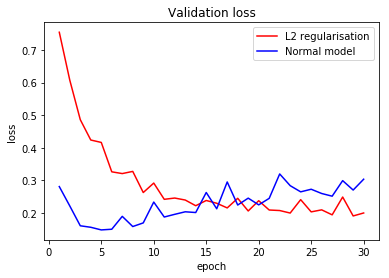

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot loss
epochs = np.arange(1,len(history_network_l2reg.history['loss'])+1)
plt.title('Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history_network_l2reg.history['val_loss'],'r',label='L2 regularisation')
plt.plot(epochs,history_network.history['val_loss'],'b',label='Normal model')
plt.legend(loc='best')
plt.show()

### Dropout

- Aleatoriamente poner 0 en output features de una capa
- Dropout rate determina la proporcion de 0s
- Funciona al eliminar patrones espurios (evita overfitting)

In [22]:
#modelo con regularizacion por dropout
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(256,activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10,activation='softmax'))

network_dropout.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_network_dropout = network_dropout.fit(train_data,train_labels,epochs=30,batch_size=128,validation_split=0.8)

Train on 11999 samples, validate on 48001 samples
Epoch 1/30
11999/11999 [==============================] - 3s 219us/step - loss: 0.7069 - acc: 0.7778 - val_loss: 0.3199 - val_acc: 0.9034
Epoch 2/30
11999/11999 [==============================] - 2s 190us/step - loss: 0.3306 - acc: 0.8994 - val_loss: 0.2363 - val_acc: 0.9264
Epoch 3/30
11999/11999 [==============================] - 3s 229us/step - loss: 0.2420 - acc: 0.9292 - val_loss: 0.2011 - val_acc: 0.9379
Epoch 4/30
11999/11999 [==============================] - 4s 312us/step - loss: 0.1966 - acc: 0.9410 - val_loss: 0.1776 - val_acc: 0.9469
Epoch 5/30
11999/11999 [==============================] - 3s 244us/step - loss: 0.1629 - acc: 0.9499 - val_loss: 0.1672 - val_acc: 0.9498
Epoch 6/30
11999/11999 [==============================] - 4s 294us/step - loss: 0.1459 - acc: 0.9562 - val_loss: 0.1645 - val_acc: 0.9524
Epoch 7/30
11999/11999 [==============================] - 3s 215us/step - loss: 0.1248 - acc: 0.9629 - val_loss: 0.1629 - 

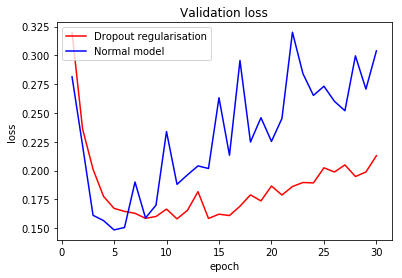

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot loss
epochs = np.arange(1,len(history_network_l2reg.history['loss'])+1)
plt.title('Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs,history_network_dropout.history['val_loss'],'r',label='Dropout regularisation')
plt.plot(epochs,history_network.history['val_loss'],'b',label='Normal model')
plt.legend(loc='best')
plt.show()

## Función de pérdida / función de activación

- Dependiente del problema
 - clasificación binaria: activación ultima capa (sigmoide), función de perdida (binary_crossentropy)
 - clasificacion multiclase: activación ultima capa (softmax), función de perdida (categorical_crossentropy)
 - regresión con valores arbitrarios: activación ultima capa (none), función de perdida (mse)
 - regresión valores 0 a 1: activación ultima capa (sigmoide), función de perdida (mse o binary_crossentropy)
 
 Info en Keras https://keras.io/losses/